In [92]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from io import StringIO
from IPython.display import display, HTML
%matplotlib inline
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})

|key            | explanation                                     |
|-----------------------------------------------------------------|
|survival       | Survival    (0 = No; 1 = Yes)                   |
|pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower   |
|name           | Name                                            |
|sex            | Sex                                             |
|age            | Age in years, Fractional if Age less than One, If the Age is Estimated, it is in the form xx.5                                           |
|sibsp          | Number of Siblings/Spouses Aboard  Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)             |
|parch          | Number of Parents/Children Aboard Parent:   Mother or Father of Passenger Aboard Titanic Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic Some children travelled only with a nanny, therefore parch=0 for them. |
|ticket         | Ticket Number                                   |
|fare           | Passenger Fare                                  |
|cabin          | Cabin                                           |
|embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

In [235]:
column_types = {
    'PassengerId': 'int32',
    'Pclass': 'category',
    'Sex': 'category',
    'Age': 'float32',
    'SibSp': 'int8',
    'Parch': 'int8',
    'Fare': 'Float64',
    'Embarked': 'category',
    'Survived': 'category'
}
train = pd.read_csv('data/train.csv', dtype=column_types)


# move survived to the end
def move_to_end(col_name, df):
    cols = list(df)
    cols.append(cols.pop(cols.index(col_name)))
    return df.ix[:, cols]


train = move_to_end('Ticket', train)
train = move_to_end('Name', train)
train = move_to_end('Survived', train)

test = pd.read_csv('data/test.csv', dtype=column_types)
test = move_to_end('Ticket', test)
test = move_to_end('Name', test)

train.Survived.cat.rename_categories(['No', 'Yes'], inplace=True)
train.Embarked.cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)
train.Embarked.cat.reorder_categories(['Cherbourg', 'Southampton', 'Queenstown'], inplace=True)
test.Embarked.cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)
test.Embarked.cat.reorder_categories(['Cherbourg', 'Southampton', 'Queenstown'], inplace=True)

In [10]:
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,40.2 KiB
Average record size in memory,46.2 B
Numeric,5
Categorical,6
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


In [11]:
display(train.head()), display(test.head()) 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket,Name,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,Southampton,A/5 21171,"Braund, Mr. Owen Harris",No
1,2,1,female,38.0,1,0,71.2833,C85,Cherbourg,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Yes
2,3,3,female,26.0,0,0,7.9250,NaN,Southampton,STON/O2. 3101282,"Heikkinen, Miss. Laina",Yes
3,4,1,female,35.0,1,0,53.1000,C123,Southampton,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Yes
4,5,3,male,35.0,0,0,8.0500,NaN,Southampton,373450,"Allen, Mr. William Henry",No


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket,Name
0,892,3,male,34.5,0,0,7.8292,NaN,Queenstown,330911,"Kelly, Mr. James"
1,893,3,female,47.0,1,0,7.0000,NaN,Southampton,363272,"Wilkes, Mrs. James (Ellen Needs)"
2,894,2,male,62.0,0,0,9.6875,NaN,Queenstown,240276,"Myles, Mr. Thomas Francis"
3,895,3,male,27.0,0,0,8.6625,NaN,Southampton,315154,"Wirz, Mr. Albert"
4,896,3,female,22.0,1,1,12.2875,NaN,Southampton,3101298,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


(None, None)

In [14]:
train.groupby('Pclass')['Age', 'Fare', 'Survived'].mean()

,Age,Fare
Pclass,,
1,38.233440,84.154687
2,29.877630,20.662183
3,25.140619,13.675550


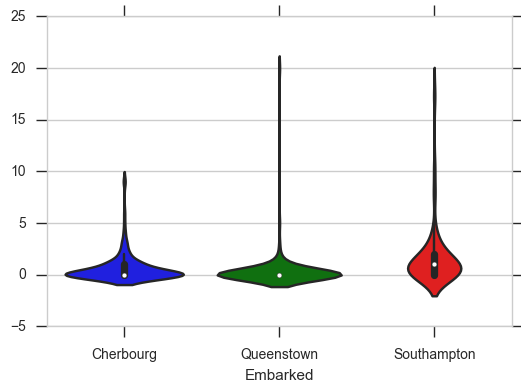

In [25]:
sns.violinplot(data=pd.crosstab(test.Fare, test.Embarked))

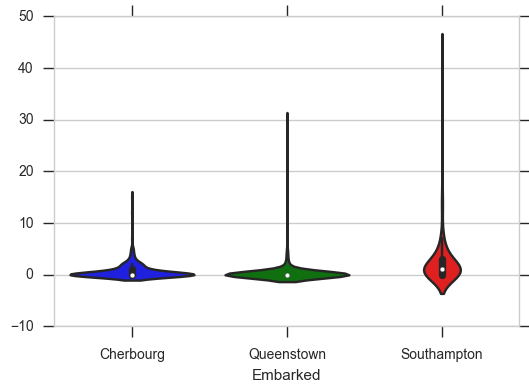

In [26]:
sns.violinplot(data=pd.crosstab(train.Fare, train.Embarked))

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


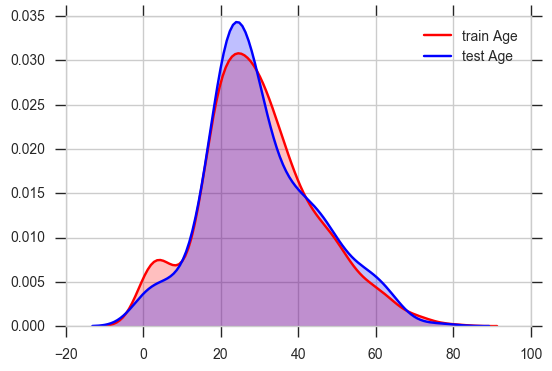

In [54]:
def kde(column):
    sns.kdeplot(train[column], color='r', label='train ' + column, shade=True)
    sns.kdeplot(test[column], color='b', label='test ' + column, shade=True)
kde('Age')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


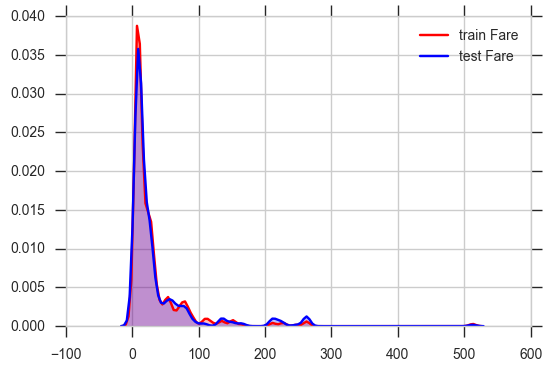

In [55]:
kde('Fare')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


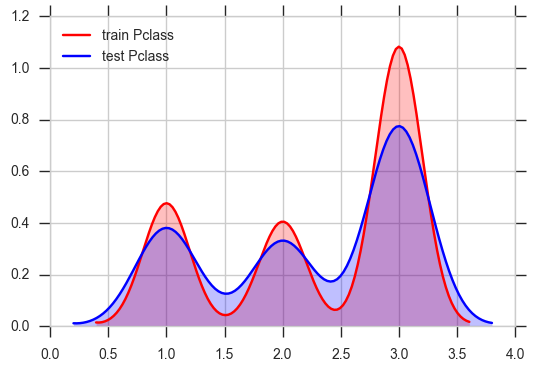

In [56]:
kde('Pclass')

In [58]:
pd.pivot_table(train, values='Age', index=['Sex', 'Pclass'], columns=['Embarked', 'Survived'], aggfunc='mean')

Embarked       Cherbourg            Queenstown       Southampton           
Survived              No        Yes         No   Yes          No        Yes
Sex    Pclass                                                              
female 1       50.000000  35.675674        NaN  33.0   13.500000  33.619049
       2             NaN  19.142857        NaN  30.0   36.000000  29.091667
       3       20.700001  11.045455  28.100000  17.6   23.688889  22.548388
male   1       43.049999  36.437500  44.000000   NaN   45.362499  36.121666
       2       29.500000   1.000000  57.000000   NaN   33.414474  17.094999
       3       27.555555  18.488571  28.076923  29.0   27.168478  22.933332

In [70]:
p = pd.pivot_table(train, values='Fare', index=['Sex', 'Pclass'], columns=['Embarked', 'Survived'], aggfunc='mean')
display(p)
display(p.stack(level=0)) 
display(p.unstack(level=0))

Embarked       Cherbourg             Queenstown            Southampton  \
Survived              No         Yes         No        Yes          No   
Sex    Pclass                                                            
female 1       28.712500  117.710019        NaN  90.000000  151.550000   
       2             NaN   25.268457        NaN  12.350000   18.250000   
       3       14.653125   14.717220  10.904633  10.084033   21.969018   
male   1       80.847160  112.197806  90.000000        NaN   53.563316   
       2       25.418225   25.433350  12.350000        NaN   18.997561   
       3        8.720842   11.435840  11.841550  12.916667   12.758689   

Embarked                  
Survived             Yes  
Sex    Pclass             
female 1       96.743298  
       2       22.272951  
       3       13.171842  
male   1       51.832739  
       2       20.516667  
       3       17.033450

Survived                           No         Yes
Sex    Pclass Embarked                           
female 1      Cherbourg     28.712500  117.710019
              Queenstown          NaN   90.000000
              Southampton  151.550000   96.743298
       2      Cherbourg           NaN   25.268457
              Queenstown          NaN   12.350000
              Southampton   18.250000   22.272951
       3      Cherbourg     14.653125   14.717220
              Queenstown    10.904633   10.084033
              Southampton   21.969018   13.171842
male   1      Cherbourg     80.847160  112.197806
              Queenstown    90.000000         NaN
              Southampton   53.563316   51.832739
       2      Cherbourg     25.418225   25.433350
              Queenstown    12.350000         NaN
              Southampton   18.997561   20.516667
       3      Cherbourg      8.720842   11.435840
              Queenstown    11.841550   12.916667
              Southampton   12.758689   17.033450

Embarked  Cherbourg                                    Queenstown            \
Survived         No                    Yes                     No             
Sex          female       male      female        male     female      male   
Pclass                                                                        
1         28.712500  80.847160  117.710019  112.197806        NaN  90.00000   
2               NaN  25.418225   25.268457   25.433350        NaN  12.35000   
3         14.653125   8.720842   14.717220   11.435840  10.904633  11.84155   

Embarked                       Southampton                                   
Survived        Yes                     No                   Yes             
Sex          female       male      female       male     female       male  
Pclass                                                                       
1         90.000000        NaN  151.550000  53.563316  96.743298  51.832739  
2         12.350000        NaN   18.250000  18.997561  22.272951  20.516667  
3         10.084033  12.916667   21.969018  12.758689  13.171842  17.033450

Index(['Embarked', 'Pclass', 'Sex', 0], dtype='object')

,Embarked,Pclass,Sex,0
0,Cherbourg,1,female,115.640309
1,Cherbourg,1,male,93.536707
2,Cherbourg,2,female,25.268457
3,Cherbourg,2,male,25.421250
4,Cherbourg,3,female,14.694926
5,Cherbourg,3,male,9.352237
6,Queenstown,1,female,90.000000
7,Queenstown,1,male,90.000000
8,Queenstown,2,female,12.350000
9,Queenstown,2,male,12.350000


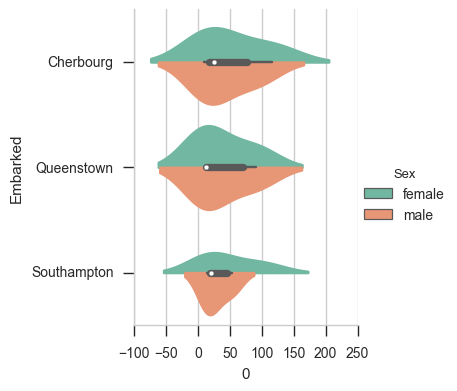

In [118]:
p = pd.pivot_table(train, values='Fare', index=['Sex'], columns=['Embarked', 'Pclass'], aggfunc=np.mean).unstack().reset_index()
display(p.columns)
display(p)
sns.factorplot(x=0, y='Embarked', data=p, hue='Sex', orient="h", split=True, palette="Set2", kind='violin') 

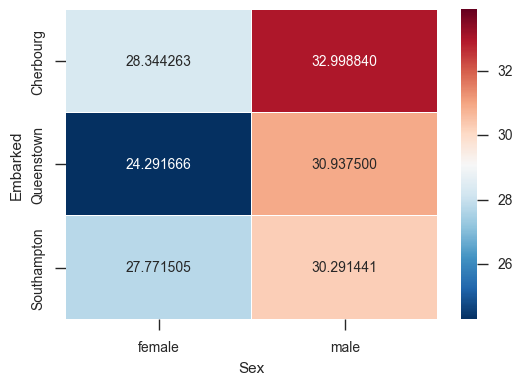

In [151]:
p = train.pivot_table(index='Embarked', columns='Sex', values='Age', aggfunc=np.mean)
sns.heatmap(p, fmt='f', annot=True, linewidth=0.1, center=p.unstack().mean())

AttributeError: 'Rolling' object has no attribute 'plot'

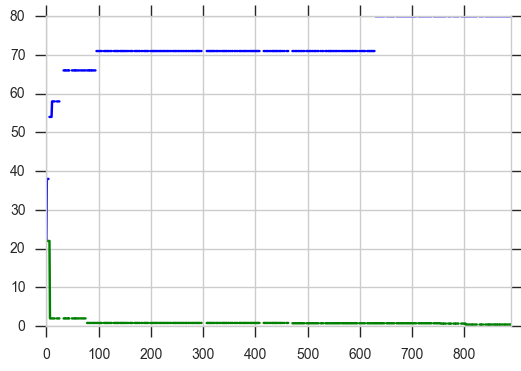

In [158]:
train.Age.cummax().plot()
train.Age.cummin().plot()
train.Age.rolling(5).plot()

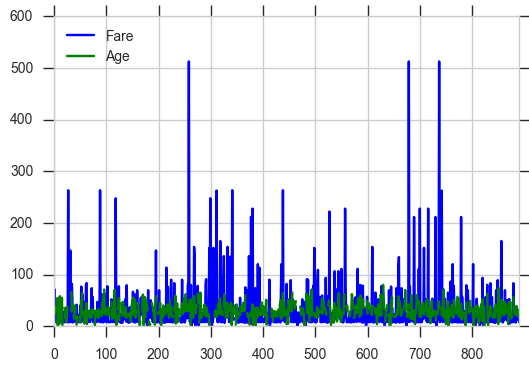

In [166]:
train[ ['Fare', 'Age'] ].plot()

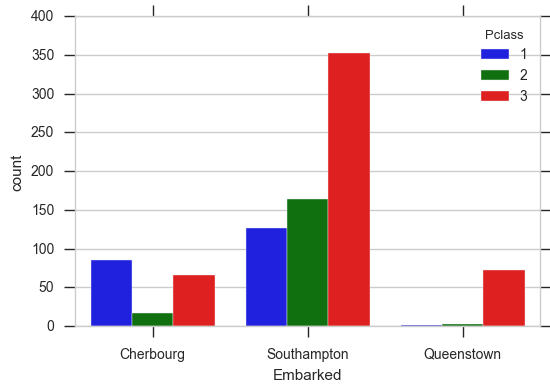

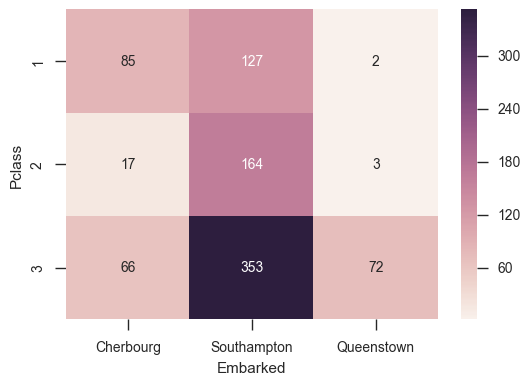

In [236]:
sns.countplot(x='Embarked', data=train, hue='Pclass'); plt.show(); sns.heatmap(data=pd.crosstab(train.Pclass, train.Embarked), fmt='d', annot=True)

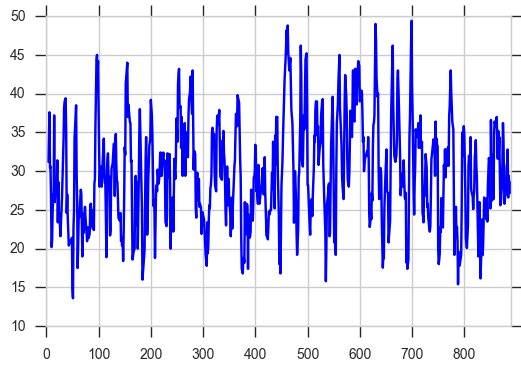

In [164]:
train.Age.dropna().rolling(5).mean().plot()